# AutoClean y Predicción del tiempo de Intervención

- Grupo de Proyecto: Whitthe

## Index

1.[Carga de datos y Exploración](#id1)

2.[AutoClean](#id2)

3.[Importancia de carácteristicas (RandomForest)](#id3)

4.[Primero modelos](#id4)

5.[Anexo](#id5)

## 1. Carga datos y Exploración<a name="id1"></a>

Proceso fundamental para comprender y trabajar con los datos que se explorarán y analizarán, sentando las bases para análisis posteriores y la construcción de modelos.

In [ ]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')

# Convertir todas las variables a tipo str
data = data.astype(str)

data = data.drop('Otro..especifique..1', axis=1)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
1,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos
2,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,60-90 minutos
3,Sí,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
4,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos


### Distribución

Comenzaremos con la dsitribución de nuesta variable predictora, a ver con que nos encontramos

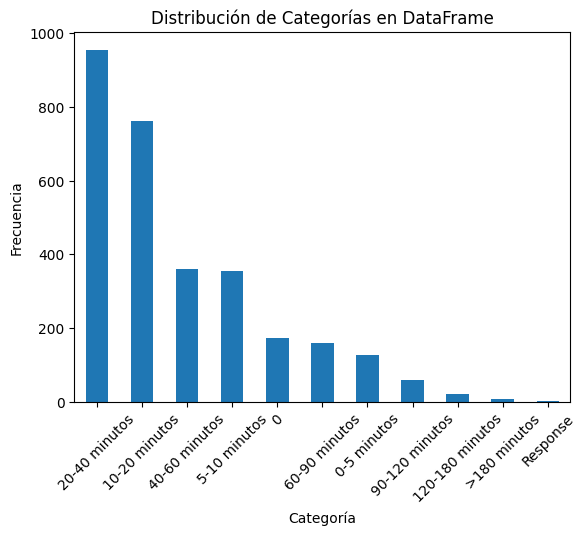

In [ ]:
frecuencias = data['duracion_intervencion'].value_counts()

import matplotlib.pyplot as plt

# Creando el gráfico de barras
frecuencias.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en DataFrame')
plt.xticks(rotation=45)  # Rota las etiquetas de las categorías para mejor visualización
plt.show()


#### Interpretación

En los datos de nuestra variable predictora, tenemos **2 valores** que no correponden a la naturalidad de los datos, esto son '0' y 'Responde'.

Vamos a proceder con la eliminación de las filas que contengan estos valores para no afectar negativamente al análisis y logicamente por el nulo sentido de analizar algo que es incorrecto.

Vamos a eliminar tambien la variabe de **"0-5 minutos"**, ya que es poco representativa y común, ya que tenemos otras que capturan mejor el tiempo que dura la intervención quirurgica.

In [ ]:
import pandas as pd

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
#data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
#data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())

# Resetear el índice del DataFrame limpio
data.reset_index(drop=True, inplace=True)

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '120-180 minutos' '90-120 minutos'
 '>180 minutos']


Una vez tenemos la variable predictora preparada y analizada, vamos a relaizar la partición de los datos en Train, Test y sus escalados.

Vamos con la limpieza de los datos.

#### Codificación de Duracion_Intervencion

Vamos a crear de 4 niveles para las duraciones en las intervenciones:

- Cortas (5 min - 20 min)
- Medias (30 min - 60 min)
- Largas (60 min - 90 min)
- Muy largas (+ 120 min)

In [ ]:
(data['duracion_intervencion']).unique()

array(['10-20 minutos', '20-40 minutos', '60-90 minutos', '40-60 minutos',
       '5-10 minutos', '0-5 minutos', '120-180 minutos', '90-120 minutos',
       '>180 minutos'], dtype=object)

In [ ]:
import pandas as pd

# Mapeo de los rangos a los niveles numéricos
mapeo = {
    '0-5 minutos':0,
    '5-10 minutos': 0,
    '10-20 minutos': 0,
    '20-40 minutos': 1,
    '40-60 minutos': 1,
    '60-90 minutos': 2,
    '90-120 minutos':2,
    '120-180 minutos': 3 ,
    '>180 minutos': 3}

# Aplicar el mapeo al DataFrame
data['duracion_intervencion'] = data['duracion_intervencion'].map(mapeo)

___

## 2. Autoclean<a name="id2"></a>

La librería datacleaner es una herramienta de Python que automáticamente limpia y preprocesa el conjunto de datos para el análisis de datos y el modelado de machine learning.

El módulo autoclean de datacleaner es probablemente el más conocido y utilizado.

En nuestro caso, el cambio realizado mas notable es:

- **Estandarización de Columnas Numéricas**: Puede escalar las características numéricas para que tengan un rango común o una distribución estándar, lo que es comúnmente necesario para modelos de machine learning que son sensibles a la escala de los datos.

Pero antes de nada, un paso vital.

### Busqueda de Na's

Paso esencial en la limpieza y preparación de datos. Los Na's pueden afectar negativamente el análisis y el modelado de datos, por lo que identificarlos y manejarlos de manera adecuada es fundamental.

En esta etapa, se busca cualquier valor Na en el conjunto de datos y se decide cómo abordarlos, en nuestro caso será con la librería Autoclean.

In [ ]:
data.isnull().sum()

Medicación.Actual                             0
Alcohol                                       0
Otras.Drogas                                  0
Tuberculosis                                  0
Nitratos.orgánicos                            0
                                             ..
Implante.6...Defecto.tipo.II..supraóseo..1    0
Implante.7...Posición                         0
Implante.7...Defecto.tipo.I..infraóseo.       0
Implante.7...Defecto.tipo.II..supraóseo.      0
duracion_intervencion                         0
Length: 100, dtype: int64

Como se puede observar, **NO** tenemos Na's e nuestro conjunto de datos.

### Limpieza

Vamos con la librería, observemos los cambios que produce

In [ ]:
!pip install datacleaner

In [ ]:
from datacleaner import autoclean

data= autoclean(data)

# Los exportamos para usarlos mas abajo
data.to_csv("data_clean.csv", index=False)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Como bien podemos observar, nuestras columnas, que son de naturaleza categórica, han sido reemplazadas por numeros, que nos indican las distintas categorias que tienen nuestreas variables, esto facilitará la labor de análisis muchisimo.

El siguiente paso es de gran importancia.

___

## 3. Importancia de carácteristicas (RandomForest)<a name="id3"></a>

La importancia de las características (o importancia de los atributos) en el contexto de un modelo de Random Forest es una medida de la contribución de cada característica en la predicción de la variable objetivo.

Trata de **cuantificar cuánto ayuda** cada característica para mejorar la precisión del modelo.

En un modelo de Random Forest, que es un ensamble de árboles de decisión, cada árbol se construye como resultado de un proceso estocástico que implica seleccionar subconjuntos de características y subconjuntos de datos. Después de entrenar, cada árbol de decisión dentro del bosque tiene una idea de cuáles características ayudaron más a hacer predicciones precisas.

Existe un paso necesario antes de ajustar el modelo para visualizar la importancia de las características.

### Partición de los datos

Vamos a dividir nuestro cojunto de datos en Train, Test y sus escalados.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ya estamos preparados para seguir con la visualización de las características más importantes.

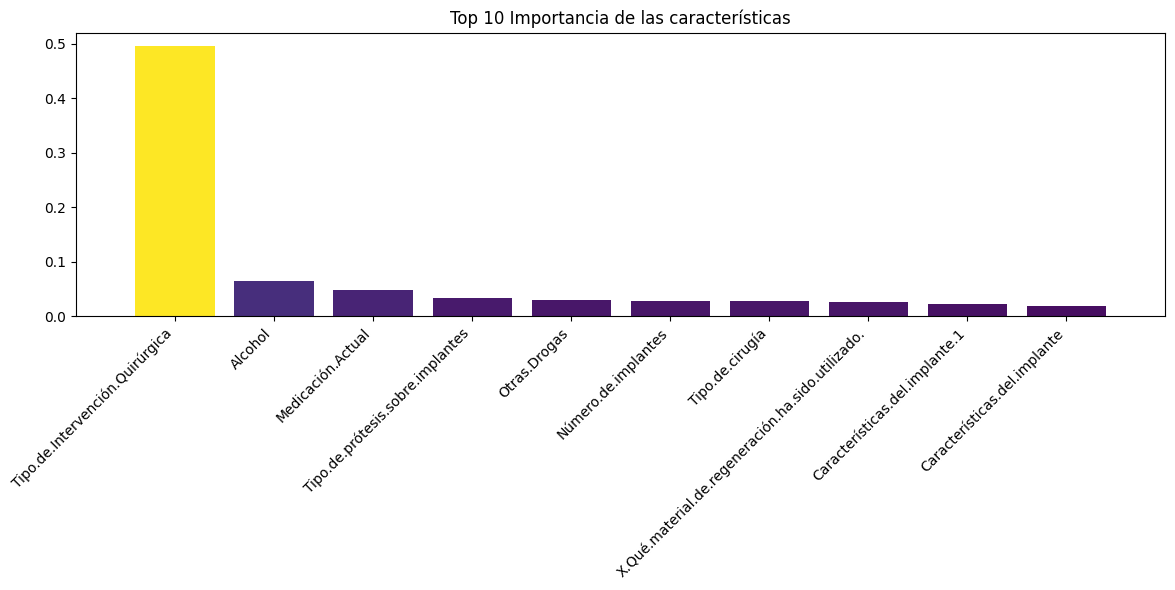

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = data.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data = data[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es necesario

#### One-Hot encodig

In [ ]:
categorical_cols = [col for col in data.columns if col != 'duracion_intervencion']

df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
data = df_encoded

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data.head()


,duracion_intervencion,Tipo.de.Intervención.Quirúrgica_1,Tipo.de.Intervención.Quirúrgica_2,Alcohol_1,Alcohol_2,Medicación.Actual_1,Tipo.de.prótesis.sobre.implantes_1,Tipo.de.prótesis.sobre.implantes_2,Tipo.de.prótesis.sobre.implantes_3,Tipo.de.prótesis.sobre.implantes_4,...,Características.del.implante.1_5,Características.del.implante.1_6,Características.del.implante.1_7,Características.del.implante.1_8,Características.del.implante_1,Características.del.implante_2,Características.del.implante_3,Características.del.implante_4,Características.del.implante_5,Características.del.implante_6
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Alarma 2!!!**

La variable **"Otro..especifique..1"**, tiene una distribución que puede molestar en el análisis, haciendo que las prediciones no sean correctas y se clasifiquen mas las duraciones de las cirugías.

El problema fué a la hora de establecer la forma de rellenar la columna, ya que no se siguió ningún parámetro de idoneidad para todos los que fuerán a rellenarla. Es por ello que tenemos muchas variables con el mismo nombre, pero de muchisimas formas distintas y arreglarlo es tedioso.

Es por ellos que decidimos eliminarla al principio y sacrificar esta información para la mejora del modelo.

___

## 4. Primero modelos<a name="id4"></a>

En este punto, vamos a comenzar con algunos modelos de classificación, para poder predecir que intervalo de duración nos va a llevar realizar la intervención quirurgica.

El procedimiento que vamos a realizar es el de automatizar el proceso de probar varios modelos a la vez y comparar su rendimiento. Esta técnica a menudo se conoce como **evaluación de modelo o selección de modelo**.

En Python, podemos hacer esto utilizando la librería scikit-learn y su módulo model_selection. Una manera de hacer esto es utilizando Pipeline para el preprocesamiento y la evaluación de diferentes modelos, junto con **GridSearchCV** o **RandomizedSearchCV** para la optimización de hiperparámetros.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


# Definir un diccionario de modelos a probar
modelos = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

# Lista para almacenar los resultados y los nombres de los modelos
resultados = []
nombres = []

# Bucle para evaluar cada modelo
for nombre, modelo in modelos.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('modelo', modelo)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    resultados.append(cv_scores)
    nombres.append(nombre)
    print(f'{nombre}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')


LogisticRegression: 0.4702 (+/- 0.0178)
SGDClassifier: 0.4443 (+/- 0.0392)
SVC: 0.4697 (+/- 0.0186)
KNeighborsClassifier: 0.4545 (+/- 0.0218)
DecisionTreeClassifier: 0.4684 (+/- 0.0146)
RandomForestClassifier: 0.4697 (+/- 0.0139)
GradientBoostingClassifier: 0.4706 (+/- 0.0147)
AdaBoostClassifier: 0.4604 (+/- 0.0282)
GaussianNB: 0.4586 (+/- 0.0096)
MLPClassifier: 0.4777 (+/- 0.0137)
XGBClassifier: 0.4697 (+/- 0.0156)


### Hiperparámetros

La optimización de hiperparámetros es crucial porque los parámetros predeterminados de la mayoría de los algoritmos de machine learning raramente son los óptimos para un conjunto de datos específico. Ajustar estos hiperparámetros puede significativamente mejorar el rendimiento del modelo.

Como podemos observar, la busqueda de hiperparámetros no es la mejor opción, he hecho el modelo por defecto me da mejor ajuste.

Probemos con alguna otra cosa.

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [ ]:
import pandas as pd

# Convertir todas las columnas booleanas a tipo int
data = data.astype({col: int for col in data.columns if data[col].dtype == bool})

# Mostrar los tipos de datos para verificar la conversión
print(data.dtypes)


duracion_intervencion                                  int64
Tipo.de.Intervención.Quirúrgica_1                      int64
Tipo.de.Intervención.Quirúrgica_2                      int64
Alcohol_1                                              int64
Alcohol_2                                              int64
Medicación.Actual_1                                    int64
Tipo.de.prótesis.sobre.implantes_1                     int64
Tipo.de.prótesis.sobre.implantes_2                     int64
Tipo.de.prótesis.sobre.implantes_3                     int64
Tipo.de.prótesis.sobre.implantes_4                     int64
Otras.Drogas_1                                         int64
Número.de.implantes_1                                  int64
Número.de.implantes_2                                  int64
Número.de.implantes_3                                  int64
Número.de.implantes_4                                  int64
Número.de.implantes_5                                  int64
Número.de.implantes_6   

In [ ]:
import numpy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ahora puedes verificar el balance de clases después de SMOTE
print("Distribución de clase original:", {label: count for label, count in zip(*np.unique(y_train, return_counts=True))})
print("Distribución de clase después de SMOTE:", {label: count for label, count in zip(*np.unique(y_train_smote, return_counts=True))})


Distribución de clase original: {0: 945, 1: 984, 2: 153, 3: 22}
Distribución de clase después de SMOTE: {0: 984, 1: 984, 2: 984, 3: 984}


In [1]:
X_train_smote['duracion_intervencion']

NameError: name 'X_train_smote' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos en entrenamiento y prueba
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.25, random_state=42)

# Entrenar un modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluar el modelo
y_pred_smote = model.predict(X_test_smote)
print(classification_report(y_test_smote, y_pred_smote))


              precision    recall  f1-score   support

           0       0.37      0.38      0.38       255
           1       0.34      0.58      0.43       245
           2       0.61      0.28      0.38       235
           3       0.84      0.68      0.75       249

    accuracy                           0.48       984
   macro avg       0.54      0.48      0.49       984
weighted avg       0.54      0.48      0.49       984



## Tpot

TPOT (Tree-based Pipeline Optimization Tool) es una herramienta de AutoML que utiliza programación genética para optimizar automáticamente los pipelines de aprendizaje automático. Es una excelente opción cuando buscas explorar diferentes modelos y preprocesamientos de datos sin la necesidad de programar cada uno de ellos manualmente. TPOT puede descubrir combinaciones de pasos de procesamiento y modelos que ni siquiera habías considerado, y a menudo puede identificar un pipeline que funciona mejor que cualquier enfoque que hayas probado manualmente.

- Ventajas de Usar TPOT:
    - Automatización: TPOT automatiza gran parte del proceso de prueba y error en la selección y optimización de modelos y pasos de preprocesamiento.
    - Optimización: Utiliza algoritmos genéticos para optimizar eficientemente el pipeline, lo que puede ser más efectivo que la búsqueda en cuadrícula o la búsqueda aleatoria.
    - Completo: Considera no solo modelos de ML, sino también una serie de transformaciones de preprocesamiento de datos.
    - Fácil de Usar: Tiene una interfaz similar a Scikit-Learn, lo que facilita su integración en los flujos de trabajo existentes de Scikit-Learn.

- Consideraciones:
    - Tiempo de Ejecución: TPOT puede llevar mucho tiempo en ejecutarse, especialmente para conjuntos de datos grandes o complejos, ya que evalúa muchas combinaciones diferentes.
    - Recursos Computacionales: Requiere recursos computacionales significativos, que pueden ser un problema si las capacidades son limitadas.
    - Complejidad del Modelo Final: Los pipelines generados pueden ser complicados y difíciles de interpretar.
    - Overfitting: Al igual que con cualquier proceso de búsqueda de modelos, existe el riesgo de overfitting al conjunto de datos de entrenamiento, especialmente si no se gestiona cuidadosamente la validación cruzada.

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


# Instanciar TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, Y_train)

print(tpot.score(X_test, Y_test))
tpot.export('tpot_digits_pipeline.py')  # Exporta el código Python para el pipeline óptimo


ModuleNotFoundError: No module named 'tpot'